In [1]:
import os
import fastparquet
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
from glob import glob

In [2]:
def get_width(A):
    """
    Get width for every x-value.

    Parameters
    ----------
    A : ndarray
        array of shape n x 3 with cols: 'X','Y','Z'

    Returns
    -------
    ux : ndarray
        all unique x 
    w : ndarray
        widths of each profile
    """

    # get unique x values
    ux = np.unique(A[:,0])

    # get width at each ux
    w = []
    for i in ux:
        mask = (A[:,0] == i)
        y = A[mask,1]
        w.append(np.max(y) - np.min(y))
    w = np.array(w)
    return ux, w

# load data

In [3]:
if __name__ ==  '__main__': 
    # get time for performance monitoring
    t0 = time.time()

    # load first scan 
    data_dir = r"C:\Users\mie\Documents\GIT_Repositories\scan_analyze\V01"
    pq_files = glob(os.path.join(data_dir, "weld***.parquet"))
    with Pool(processes=len(pq_files)) as pool:
        df_list = pool.map(pd.read_parquet, pq_files)

    # load second scan 
    data_dir = r"C:\Users\mie\Documents\GIT_Repositories\scan_analyze\V02"
    pq_files = glob(os.path.join(data_dir, "weld***.parquet"))
    with Pool(processes=len(pq_files)) as pool:
        df_list2 = pool.map(pd.read_parquet, pq_files)

    # time
    print('read finished after: ' + str(np.round(time.time()-t0, 1)) + ' s')

read finished after: 4.0 s


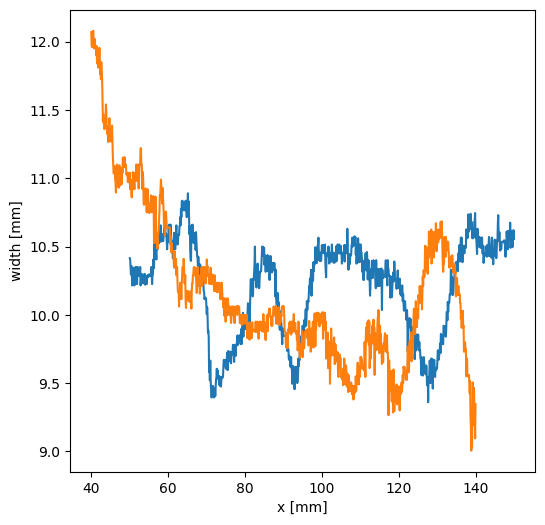

In [4]:
# select layer
i = 10

# make array from layer
A = np.array(df_list[i])
B = np.array(df_list2[i])

# get width
uxA,wA = get_width(A)
uxB,wB = get_width(B)

# Create plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(uxA,wA)
ax.plot(uxB,wB)
ax.set_xlabel('x [mm]')
ax.set_ylabel('width [mm]')
plt.show()